In [1]:
import pandas as pd
import re
import numpy as np

# Load the data
customer_categories_df = pd.read_excel('Data/Customer Categories.xlsx')

In [ ]:
print("Columns:", customer_categories_df.columns.tolist())

Columns: ['CCAT_CODE', 'CCAT_DESC']


In [3]:
print("Sample data:\n", customer_categories_df.head())

Sample data:
    CCAT_CODE                       CCAT_DESC
0          0                         Unknown
1          0                         Unknown
2          1                  House accounts
3         10                              No
4         11  stock movemnt shipments/backup


In [4]:
print("Null values:\n", customer_categories_df.isnull().sum())

Null values:
 CCAT_CODE    0
CCAT_DESC    0
dtype: int64


In [5]:
# Remove rows with any null values
customer_categories_df = customer_categories_df.dropna()

In [6]:
print("Data shape:", customer_categories_df.shape)

Data shape: (51, 2)


STANDARDIZATION OF THE VALUES (GROUPINGS AND RENAMINGS)

In [7]:
"""
This dictionary standardizes and clarifies ambiguous or inconsistent customer category descriptions (CCAT_DESC).
It serves three main purposes:
1. Replaces internal or operational labels (e.g., "samples", "stock movement shipments/backup") with grouped tags like "Operational Accounts"
2. Renames vague or status-based entries (e.g., "CLOSED", "bad debts") to clearer categories like "Inactive Accounts"
3. Cleans up location-based descriptions for consistency (e.g., "Johannesburg CBDI" → "Johannesburg CBD")

Note: Location-based entries are preserved as-is (with minor renaming) because geographic segmentation is already handled
separately via REGION_CODE and REGION_DESC. This avoids redundancy while maintaining semantic clarity.
"""

corrections = {
    # Operational and internal
    "stock movement shipments/backup": "Operational Accounts",
    "samples": "Operational Accounts",
    "House accounts": "Internal Accounts",
    "bad debts": "Inactive Accounts",
    "CLOSED": "Inactive Accounts",
    "Advertising App": "Internal Operations",
    "Advertising Appro": "Internal Operations",
    "Advertising Appo.": "Internal Operations",

    # Retail groupings
    "Departmentstore": "Retail - Department Store",
    "Speciality stores": "Retail - Specialty Stores",
    "sale goods": "Retail",

    # Botswana segmentation
    "Botswana trip excl Exports": "Botswana (Trip)",
    "Exports incl Botswana": "Botswana (Exports)",

    # Location-based cleanup
    "Johannesburg CBDl": "Johannesburg CBD",
    "Pretoria East": "Pretoria East",
    "Pretoria Central": "Pretoria Central",
    "Ermelo Pietretief": "Ermelo / Piet Retief",
    "Pietersburg / Potgietersrus": "Pietersburg / Potgietersrus",
    "Rustenburg Brits": "Rustenburg / Brits",
    "Gauteng North - Sandton": "Gauteng North - Sandton",
    "Gauteng North - Rustenburg / Izaneen": "Rustenburg / Izaneen",
    "Potch KelksD Kuruman": "Potchefstroom / Klerksdorp / Kuruman",
    "N- prov. Witbank Midd burg": "Witbank / Middelburg (Mpumalanga)",
    "kwz natal/DBN Deon": "KwaZulu-Natal / Durban",
    "G North-N/ Randburg/Rivonia": "Gauteng North - Randburg / Rivonia",
    "Gaut.N-EastgateNorwoodMidr": "Gauteng North - Eastgate / Norwood / Midrand",
    "W cape/CT": "Western Cape / Cape Town",
    "E Cape": "Eastern Cape",
    "Free state": "Free State",
    "Soweto Lenasia": "Soweto / Lenasia"
}

In [8]:
customer_categories_df['CCAT_DESC'] = customer_categories_df['CCAT_DESC'].replace(corrections)

customer_categories_df

,CCAT_CODE,CCAT_DESC
0,0,Unknown
1,0,Unknown
2,1,Internal Accounts
3,10,No
4,11,stock movemnt shipments/backup
5,12,Operational Accounts
6,13,Retail
7,14,Johannesburg CBD
8,15,no
9,16,Pretoria East


In [9]:
#Drop the rows with invalid or empty descriptions
invalid_ccat_desc = ["Unknown", "No", "no", "?", "", None]
customer_categories_df_clean = customer_categories_df[
    ~customer_categories_df['CCAT_DESC'].isin(invalid_ccat_desc)
]

In [10]:
print("Cleaned data shape:", customer_categories_df_clean.shape)

Cleaned data shape: (36, 2)


In [11]:
customer_categories_df_clean

,CCAT_CODE,CCAT_DESC
2,1,Internal Accounts
4,11,stock movemnt shipments/backup
5,12,Operational Accounts
6,13,Retail
7,14,Johannesburg CBD
9,16,Pretoria East
11,18,Pietersburg / Potgietersrus
12,19,Nelspruit / Tzaneen
13,2,Pretoria Central
14,20,Inactive Accounts


In [12]:
#Read the JSON file of the enriched customer dataframe (with valid region codes and descriptions) from customer_regions_cleaned.ipynb
customer_df = pd.read_json("customer_valid_regions_df.json", lines=True)

customer_df

,CUSTOMER_NUMBER,CCAT_CODE,REGION_CODE,REP_CODE,SETTLE_TERMS,NORMAL_PAYTERMS,DISCOUNT,CREDIT_LIMIT,REGION_DESC
0,AAMI01,41,10a,02,0,120,0,2000,Durban
1,ABHG01,49,10a,02,0,120,0,1500,Durban
2,ABHG02,39,6a,04,0,120,0,2500,East Cape
3,ABHN01,49,10a,02,0,120,0,1500,Durban
4,ABHN02,41,10a,02,0,30,0,500,Durban
...,...,...,...,...,...,...,...,...,...
1265,ZDOE01,30,7a,05,0,120,0,10000,Gauteng N - Sandton
1266,ZHAY02,19,4b,03,0,120,0,2000,Nelspruit / Tzaneen
1267,ZMAU01,37,11a,03,0,120,0,0,Free State / Lesotho
1268,ZNAE01,46,2b,05,0,120,0,30000,Krugersdorp / Sun City


In [13]:
# Merge category descriptions into customer data; JOIN based on the CCAT_CODE
customer_df_valid = customer_df.merge(
    customer_categories_df_clean[['CCAT_CODE', 'CCAT_DESC']],
    how='left',
    on='CCAT_CODE'
)

customer_df_valid

,CUSTOMER_NUMBER,CCAT_CODE,REGION_CODE,REP_CODE,SETTLE_TERMS,NORMAL_PAYTERMS,DISCOUNT,CREDIT_LIMIT,REGION_DESC,CCAT_DESC
0,AAMI01,41,10a,02,0,120,0,2000,Durban,KZN/DBN
1,ABHG01,49,10a,02,0,120,0,1500,Durban,KwaZulu-Natal / Durban
2,ABHG02,39,6a,04,0,120,0,2500,East Cape,Eastern Cape
3,ABHN01,49,10a,02,0,120,0,1500,Durban,KwaZulu-Natal / Durban
4,ABHN02,41,10a,02,0,30,0,500,Durban,KZN/DBN
...,...,...,...,...,...,...,...,...,...,...
1265,ZDOE01,30,7a,05,0,120,0,10000,Gauteng N - Sandton,Gauteng North - Sandton
1266,ZHAY02,19,4b,03,0,120,0,2000,Nelspruit / Tzaneen,Nelspruit / Tzaneen
1267,ZMAU01,37,11a,03,0,120,0,0,Free State / Lesotho,Free State
1268,ZNAE01,46,2b,05,0,120,0,30000,Krugersdorp / Sun City,Krugersdorp Suncity


In [14]:
# Count how many rows have missing CCAT_DESC after the merge
missing_ccat_desc = customer_df_valid['CCAT_DESC'].isnull().sum()

print(f"Missing CCAT_DESC values after merge: {missing_ccat_desc}")

Missing CCAT_DESC values after merge: 1


In [15]:
# Show rows with missing CCAT_DESC
unmatched_rows = customer_df_valid[customer_df_valid['CCAT_DESC'].isnull()]
print(unmatched_rows[['CUSTOMER_NUMBER', 'CCAT_CODE']].drop_duplicates())

    CUSTOMER_NUMBER  CCAT_CODE
336          GECL01         17


In [16]:
# Drop rows where CCAT_DESC is null
customer_df_valid = customer_df_valid[customer_df_valid['CCAT_DESC'].notnull()]

In [17]:
#Count once again
# Double-check that no nulls remain
print("Remaining nulls in CCAT_DESC:", customer_df_valid['CCAT_DESC'].isnull().sum())

Remaining nulls in CCAT_DESC: 0


In [18]:
#Export to a JSON format so that it can be used in further cleaning and validation
customer_df_valid.to_json("customer_region_categories_df.json", orient="records", lines=True)

customer_df_valid.to_csv("customer_region_categories_clean.csv", index=False)

VISUALIZATIONS

<Axes: ylabel='CCAT_DESC'>

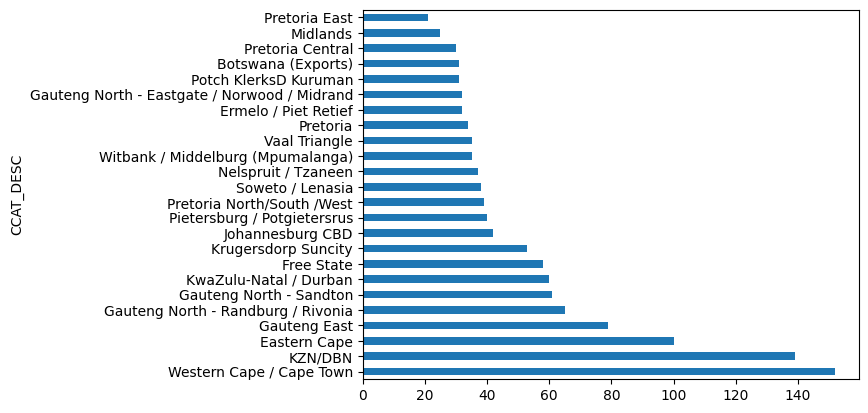

In [19]:
import matplotlib

customer_df_valid['CCAT_DESC'].value_counts().plot(kind='barh')

Customer Count by Cleaned Category

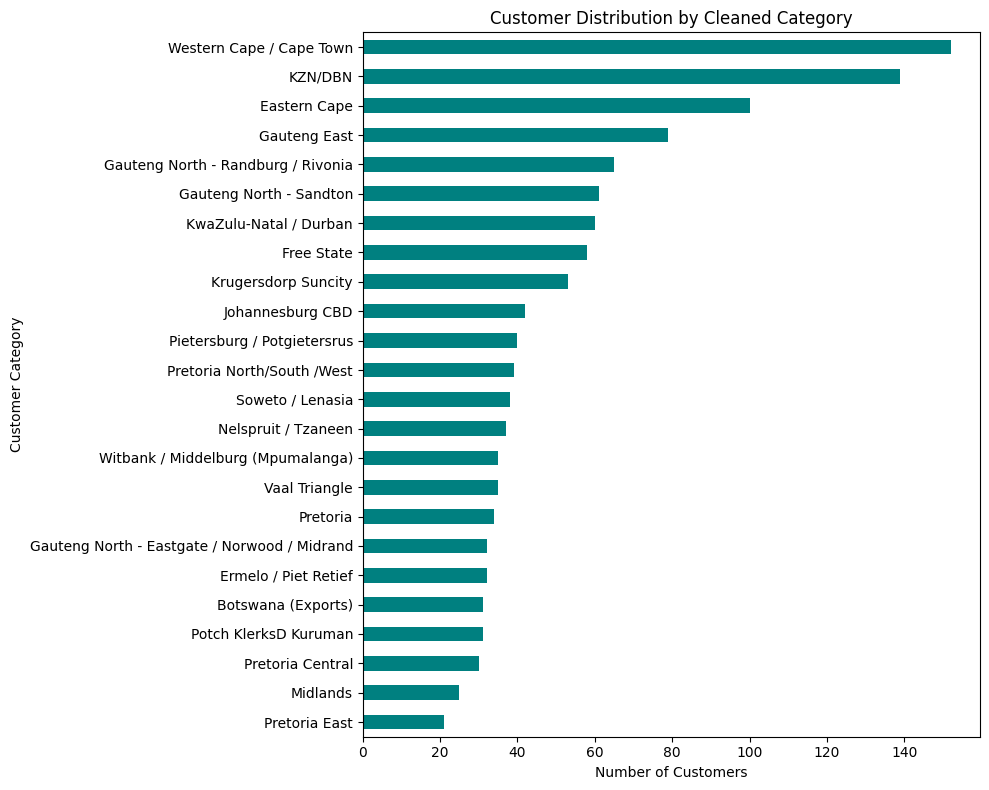

In [20]:
import matplotlib.pyplot as plt

customer_df_valid['CCAT_DESC'].value_counts().sort_values().plot(
    kind='barh', figsize=(10, 8), color='teal'
)
plt.title("Customer Distribution by Cleaned Category")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Category")
plt.tight_layout()
plt.show()

#Category Distribution by Region

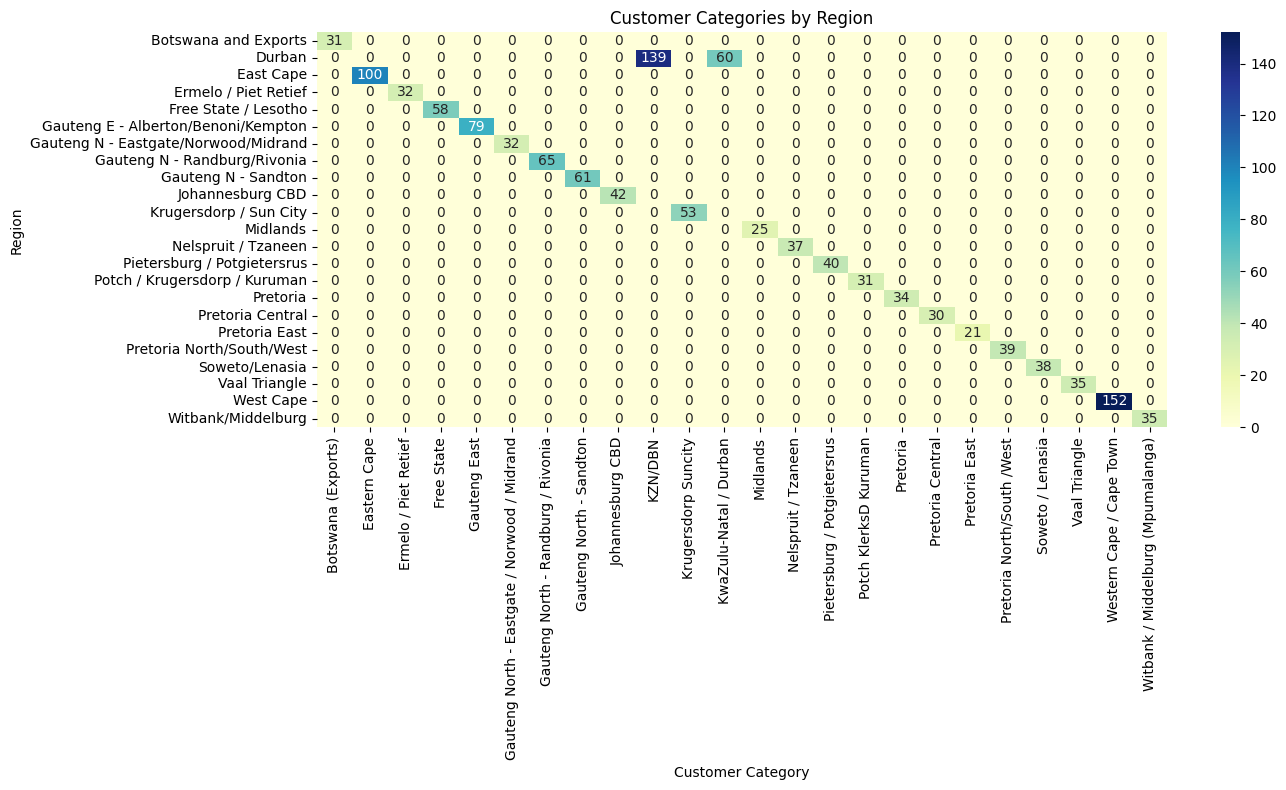

In [21]:
import seaborn as sns

pivot = customer_df_valid.pivot_table(
    index='REGION_DESC', columns='CCAT_DESC', aggfunc='size', fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Customer Categories by Region")
plt.xlabel("Customer Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Top 10 Most Common CCAT_CODEs

In [22]:
code_to_desc = customer_categories_df_clean.set_index('CCAT_CODE')['CCAT_DESC'].to_dict()
top_codes = customer_df_valid['CCAT_CODE'].value_counts().head(10)

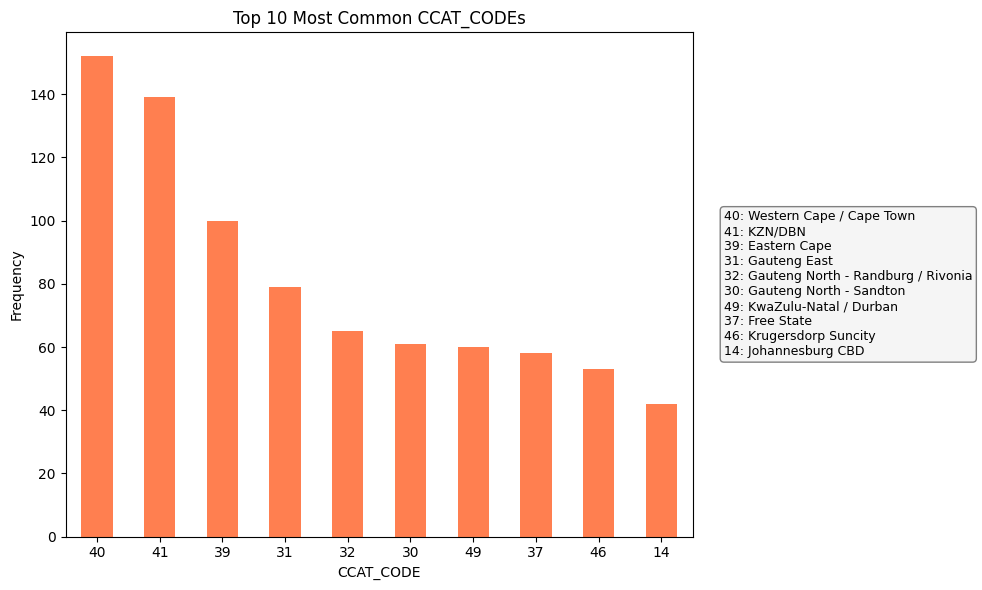

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
top_codes.plot(kind='bar', color='coral', ax=ax)

plt.title("Top 10 Most Common CCAT_CODEs")
plt.xlabel("CCAT_CODE")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Create legend text
legend_text = "\n".join([f"{code}: {code_to_desc.get(code, 'Unknown')}" for code in top_codes.index])

# Add legend box to the side
props = dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray')

# Position the legend box outside the plot area
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()